# AIR QUALITY ANALYSIS - INDIA

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

%matplotlib inline


In [2]:
mp.rcParams['figure.figsize'] = (20, 10)
style.use('ggplot')
plt.rcParams.update({'font.size':15})
Constant_Pollutants = ['Sulphur_Dioxide', 'Nitrogen_Dioxide',
                       'Respirable_Suspended_Particulate_Matter']


In [3]:
import warnings;
warnings.filterwarnings("ignore")


# Data Analysis

## Data Exploration

In [4]:
air_quality_df = pd.read_csv('./data/data.csv')


In [5]:
number_of_rows = len(air_quality_df)
print('Number of rows in the DataFrame: {}'.format(number_of_rows))


Number of rows in the DataFrame: 435742


In [6]:
air_quality_df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [7]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [8]:
air_quality_df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


## Data Cleaning

### Renaming Columns

In [9]:
air_quality_df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [10]:
air_quality_df.rename(columns={'stn_code':'Station_Code', 
                                'sampling_date': 'Sampling_Date', 
                                'state':'State', 
                                'location': 'City', 
                                'agency': 'Agency', 
                                'type': 'Area Category',
                                'so2':'Sulphur_Dioxide',
                                'no2': 'Nitrogen_Dioxide',
                                'rspm': 'Respirable_Suspended_Particulate_Matter', 
                                'spm': 'Suspended_Particulate_Matter',
                                'location_monitoring_station' : 'Monitoring_Station',
                                'pm2_5' : 'Fine_Particulate_Matter', 
                                'date': 'Date'}, inplace=True)


### Missing Values

#### Dropping Columns
* If the percentage of missing values in a column is more than 50%, that particular column will be dropped 
* The particular columns will be dropped because they won't add any value to our Air Quality Analysis
* Considering the below data, **Suspended_Particulate_Matter** and **Fine_Particulate_Matter** column will be dropped

In [11]:
def show_mising_values():
    print(((air_quality_df.isnull().sum())/(number_of_rows))*100)

In [12]:
show_mising_values()

Station_Code                               33.064749
Sampling_Date                               0.000688
State                                       0.000000
City                                        0.000688
Agency                                     34.304933
Area Category                               1.237659
Sulphur_Dioxide                             7.951035
Nitrogen_Dioxide                            3.725370
Respirable_Suspended_Particulate_Matter     9.230692
Suspended_Particulate_Matter               54.478797
Monitoring_Station                          6.309009
Fine_Particulate_Matter                    97.862497
Date                                        0.001606
dtype: float64


In [13]:
air_quality_df.drop(
    columns=['Suspended_Particulate_Matter', 'Fine_Particulate_Matter'], inplace=True)


* The **Date** Column is a cleaner version of the **Sampling_Date** column
* Hence, the **Sampling_Date** column will be dropped as well

In [14]:
air_quality_df.drop(
    columns=['Sampling_Date'], inplace=True)


* The column **Station_Code** also has 33% of its values missing
* No statistical methods can be used to input the null values with other values
* It has also got 803 unique values. Hence, it should be removed 

In [15]:
air_quality_df['Station_Code'].describe()


count     291665.0
unique       803.0
top          193.0
freq        1428.0
Name: Station_Code, dtype: float64

* The column **Agency** also has 34% of its values missing
* No statistical methods can be used to input the null values with other values
* It has also got 64 unique values. Hence, it should be removed 

In [16]:
air_quality_df['Agency'].describe()

count                                        286261
unique                                           64
top       Maharashtra State Pollution Control Board
freq                                          27857
Name: Agency, dtype: object

In [17]:
air_quality_df.drop(columns=['Agency', 'Station_Code'], inplace=True)

#### Replacing NaN values with statistical values

In [18]:
for i in ['Sulphur_Dioxide', 'Nitrogen_Dioxide', 'Respirable_Suspended_Particulate_Matter']:
    air_quality_df[i].fillna((air_quality_df[i].mean()), inplace=True)


In [19]:
show_mising_values()

State                                      0.000000
City                                       0.000688
Area Category                              1.237659
Sulphur_Dioxide                            0.000000
Nitrogen_Dioxide                           0.000000
Respirable_Suspended_Particulate_Matter    0.000000
Monitoring_Station                         6.309009
Date                                       0.001606
dtype: float64


#### Removing Rows consisting of string objects

In [20]:
air_quality_df.dropna(axis=0, how='any', inplace=True)

In [21]:
show_mising_values()

State                                      0.0
City                                       0.0
Area Category                              0.0
Sulphur_Dioxide                            0.0
Nitrogen_Dioxide                           0.0
Respirable_Suspended_Particulate_Matter    0.0
Monitoring_Station                         0.0
Date                                       0.0
dtype: float64


### Renaming Rows

In [22]:
air_quality_df['Area Category'].value_counts()



Residential, Rural and other Areas    168425
Residential and others                 86791
Industrial Area                        85465
Industrial Areas                       51747
Sensitive Area                          8979
Sensitive Areas                         5536
RIRUO                                   1304
Name: Area Category, dtype: int64

In [23]:
air_quality_df['Area Category'] = air_quality_df['Area Category'].replace(
                    ['Residential, Rural and other Areas', 'Residential and others', 'Industrial Areas', 'Sensitive Areas'],
                                        ['Residential and Rural Areas', 'Residential Areas', 'Industrial Area', 'Sensitive Area'])


In [24]:
air_quality_df['Area Category'].value_counts()

Residential and Rural Areas    168425
Industrial Area                137212
Residential Areas               86791
Sensitive Area                  14515
RIRUO                            1304
Name: Area Category, dtype: int64

## Data Visualization

* The Following Plot is used to determine the **amount of pollutants** present in a **speacific state**
    * **User Input** - The State/Union Territory in India
    * **Output** - A Bar Plot showing the amount of pollutants present in the Air
    * **Statistical Measures** - The mean of the pollutants is used to determine the requirements

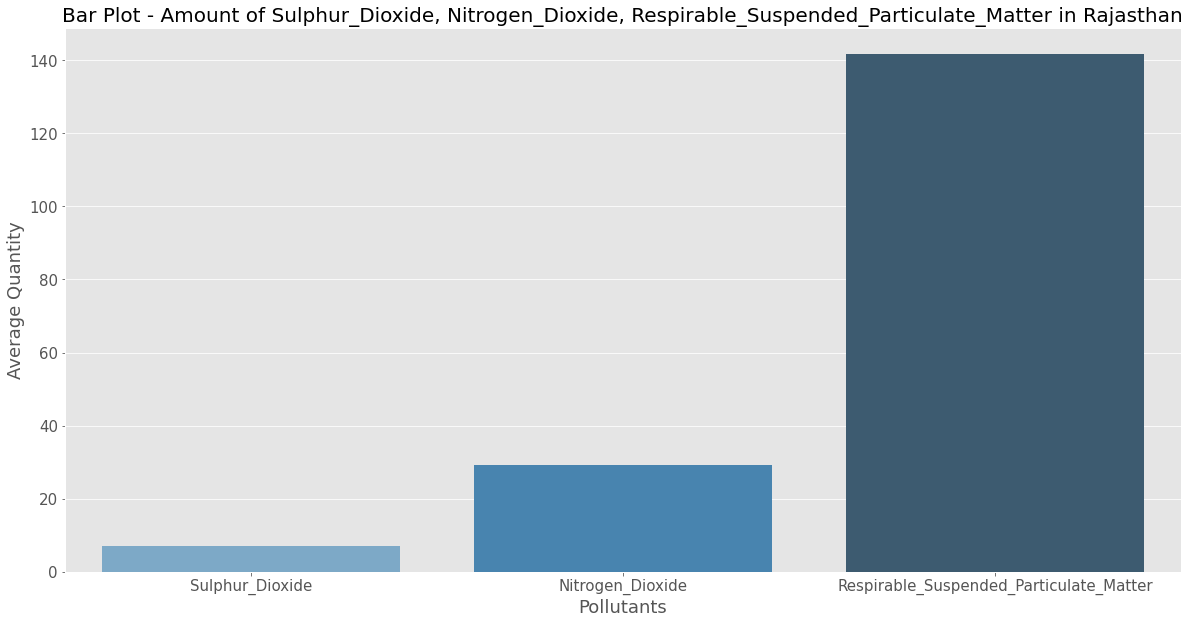

In [25]:
State = 'Rajasthan'
Constant_Pollutants = ['Sulphur_Dioxide', 'Nitrogen_Dioxide', 'Respirable_Suspended_Particulate_Matter']
Bar_Plot_Pivot = air_quality_df.loc[(air_quality_df['State'] == State), ['State', 'Sulphur_Dioxide', 'Nitrogen_Dioxide', 'Respirable_Suspended_Particulate_Matter']].groupby(by='State').mean()
Pollutants_Numbers = Bar_Plot_Pivot.loc[State].tolist()
sns.barplot(x=Constant_Pollutants, y=Pollutants_Numbers, palette="Blues_d")
plt.xlabel('Pollutants')
plt.ylabel('Average Quantity')
plt.title('Bar Plot - Amount of {}, {}, {} in {}'.format(Constant_Pollutants[0], Constant_Pollutants[1], Constant_Pollutants[2], State), fontdict={'fontsize':20})
plt.show();


* **Date** column is an string object
* In order to do Time-Series-Analysis, **Date** column will be converted to a **DateTime** object 

In [26]:

air_quality_df['Date'] = pd.to_datetime(air_quality_df['Date'])


* The following plot will give the **TOP-10** polluted states in a given **Time Duration**
    * **User Input** - Initial Date and Final Date
    * **Output** - A Bar Plot showing the Most Polluted States
    * **Statistical Measures** - The mean of the pollutants is used to determine the requirements

In [27]:
from datetime import datetime
Time_Series_df = air_quality_df.loc[(air_quality_df['Date'] > datetime(2005, 1, 1, 0 , 0, 0)) & (air_quality_df['Date'] < datetime(2005, 12, 31,  0, 0, 0))]
Start_Date = str(datetime(2005, 1, 1, 0, 0, 0).date())
End_Date = str(datetime(2005, 12, 31, 0, 0, 0).date())


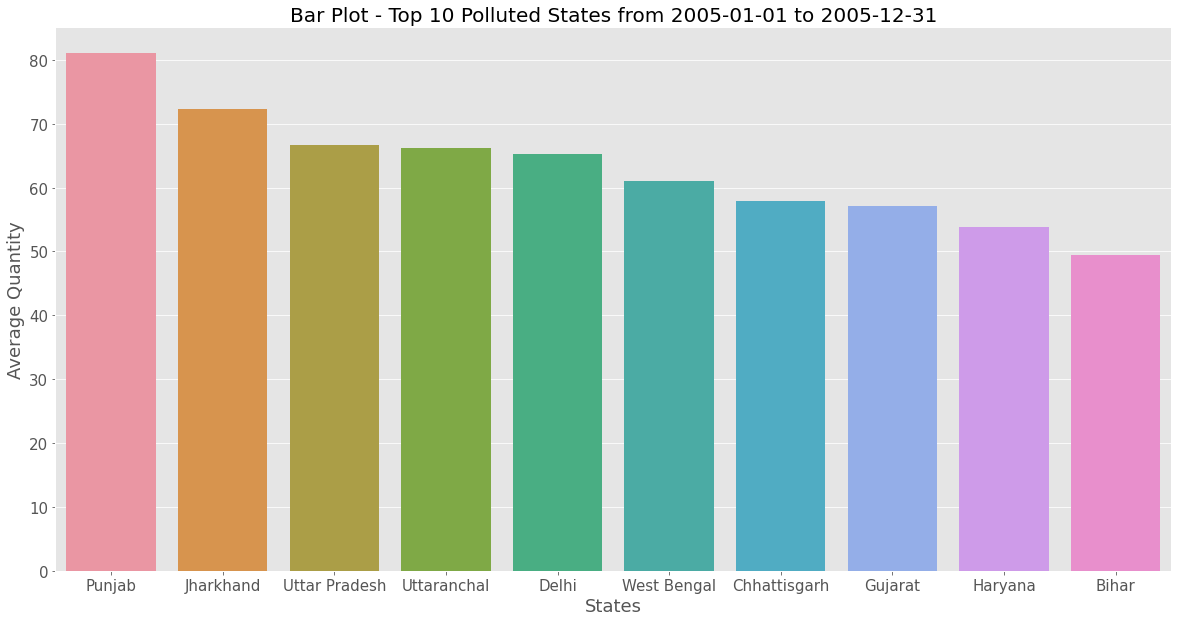

In [28]:
df = Time_Series_df.groupby('State')[Constant_Pollutants].mean()
df['Sum'] = df.mean(axis=1)
df.drop(columns=Constant_Pollutants, inplace=True)
df = df.sort_values(by=['Sum'], ascending=False)
df = df.iloc[0:10, :]
y_values = df['Sum'].tolist()
x_values = df.index.tolist()
sns.barplot(x=x_values, y=y_values)
plt.xlabel('States')
plt.ylabel('Average Quantity')
plt.title('Bar Plot - Top 10 Polluted States from {} to {}'.format(Start_Date, End_Date), fontdict={'fontsize': 20})
plt.show()


* The following plot will give the **Trend of a User-Input Pollutant** in a **User-Input Duration**
    * **User Input** - The Required Pollutant, Initial Date and the Final Date
    * **Outpu**` - A Line Plot showing the Required Trend
    * **Statistical Measures** - None Used

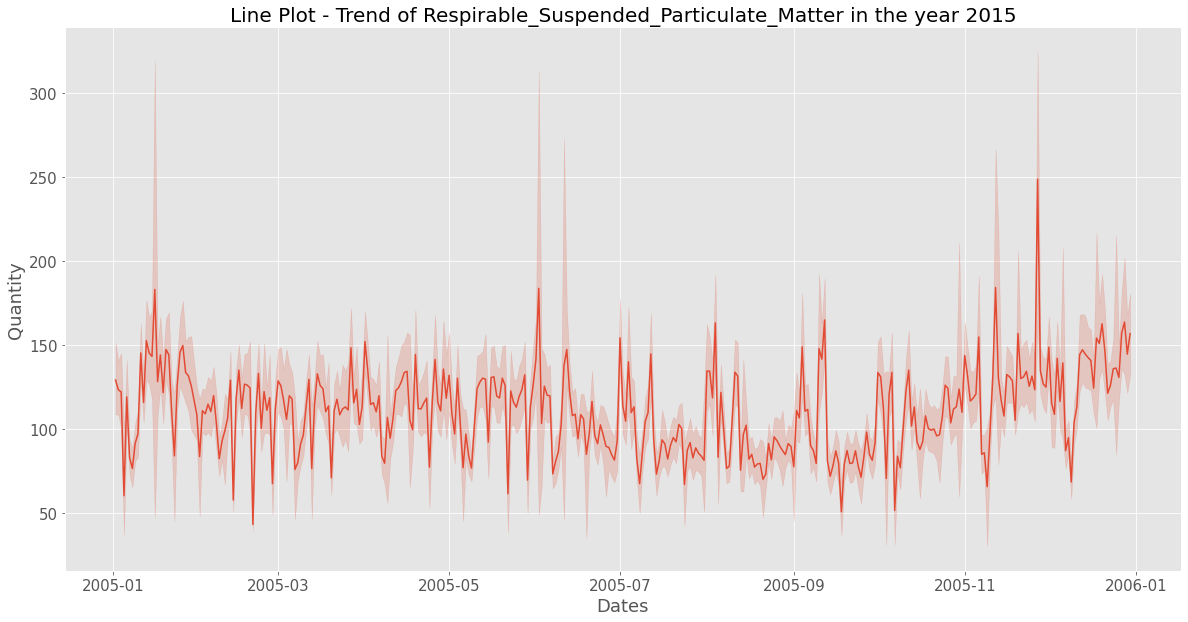

In [29]:
Required_Pollutant = Constant_Pollutants[2]
y_values = Time_Series_df.loc[:, Required_Pollutant].values.tolist()
x_values = Time_Series_df.Date
sns.lineplot(x=x_values, y=y_values, markers=True)
plt.xlabel('Dates')
plt.ylabel('Quantity')
plt.title('Line Plot - Trend of {} in the year 2015'.format(Required_Pollutant), fontdict={'fontsize':20})
plt.show()


* The following plot will give the **Distribution of a User-Input Pollutant** in a **User-Input Duration**
    * **User Input** - The Required Pollutant, Initial Date and the Final Date
    * **Output** - A Histogram and a Box Plot showing the Distribution of the Concerned Pollutant
    * **Statistical Measures** - None Used

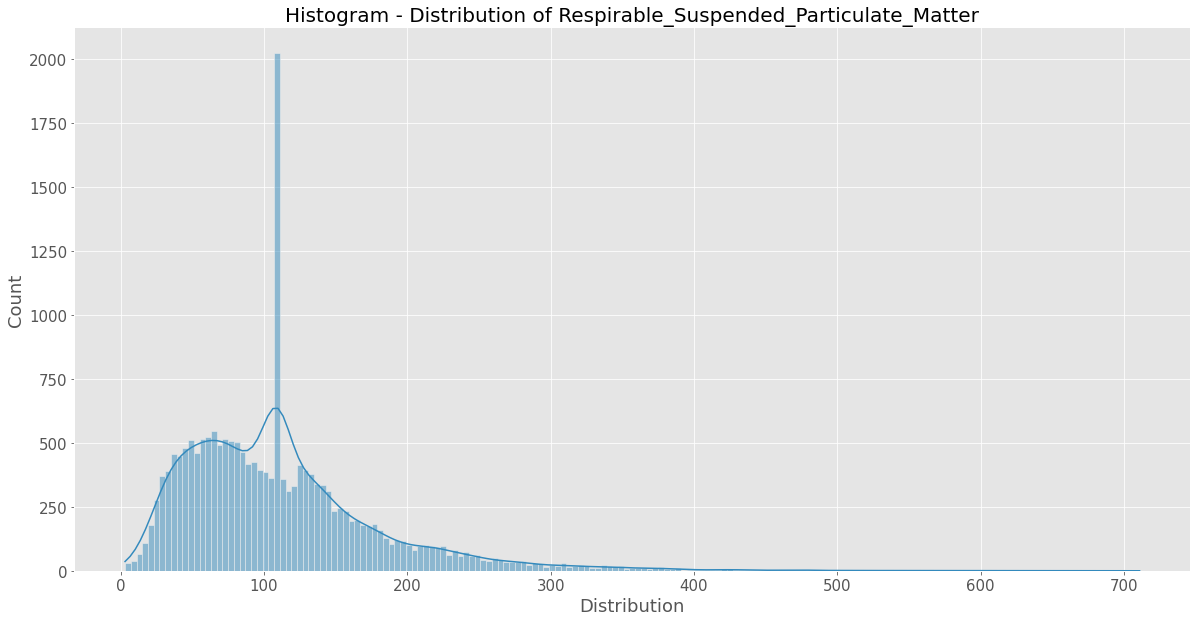

In [30]:
sns.histplot(data=Time_Series_df, x=Required_Pollutant, bins=30, binwidth=4, kde=True)
plt.xlabel('Distribution')
plt.title('Histogram - Distribution of {}'.format(Required_Pollutant), fontdict={'fontsize':20})
plt.ylabel('Count')
plt.show()


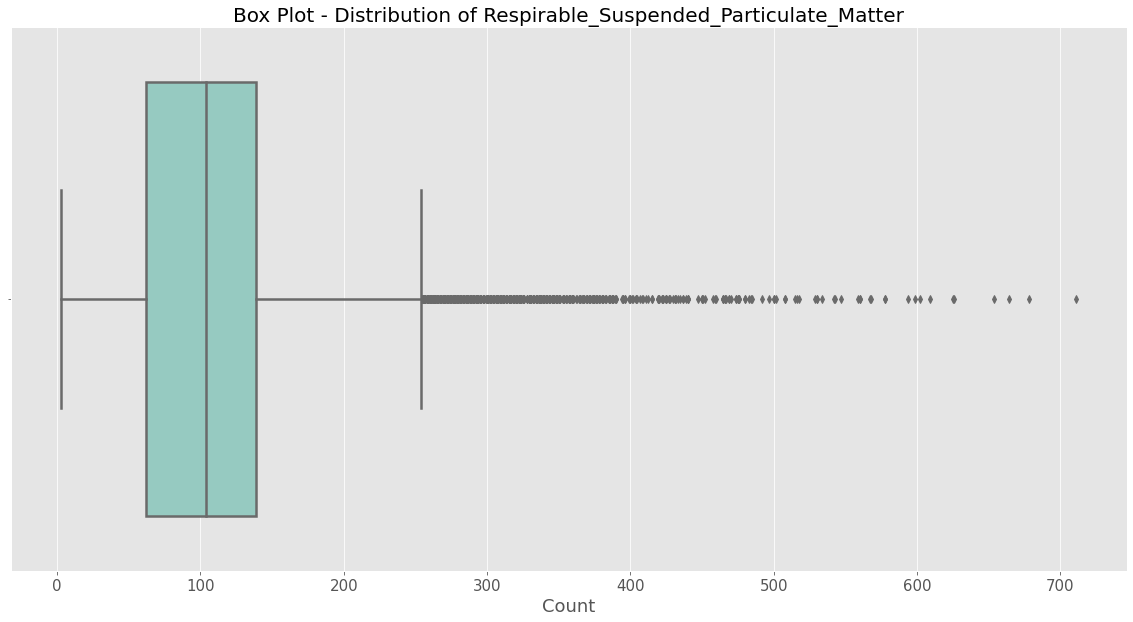

In [31]:
sns.boxplot(data=Time_Series_df, x=Required_Pollutant, palette="Set3", linewidth=2.5)
plt.xlabel('Count')
plt.title('Box Plot - Distribution of {}'.format(Required_Pollutant),
          fontdict={'fontsize': 20})
plt.show()


* The following plot will give the **Trend of a User-Input Pollutant** in a **User-Input Duration** in a **User-Input City**
    * **User Input** - The Required City, The Required Pollutant, Initial Date and the Final Date
    * **Output** - A Line Plot showing the Trend of the Concerned Pollutant
    * **Statistical Measures** - The mean of the pollutants is used to determine the requirements


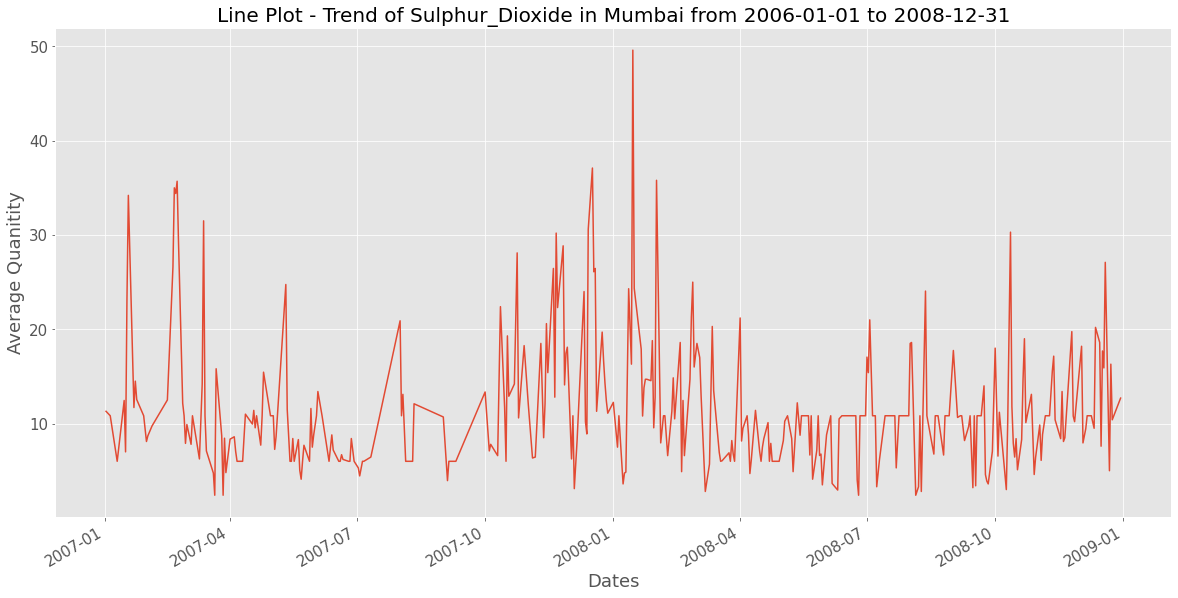

In [32]:
df = air_quality_df.set_index('Date')
City = 'Mumbai'
feature = 'Sulphur_Dioxide'
from_date = '2006-01-01'
to_date = '2008-12-31'
df[df['City'] == City].groupby('Date')[feature].mean()[
    from_date:to_date].plot()
plt.xlabel('Dates')
plt.ylabel('Average Quanitity')
plt.title('Line Plot - Trend of {} in {} from {} to {}'.format(
    feature, City, from_date, to_date), fontdict={'fontsize': 20})
plt.show()


* The following plot will give the **Stacked Bar Plot of Area Wise Pollution in a User-Input State**
    * **User Input** - The Required State
    * **Output** - A Stacked Bar Plot showing the Area Wise Pollution in the Concerned State
    * **Statistical Measures** - The mean of the pollutants is used to determine the requirements


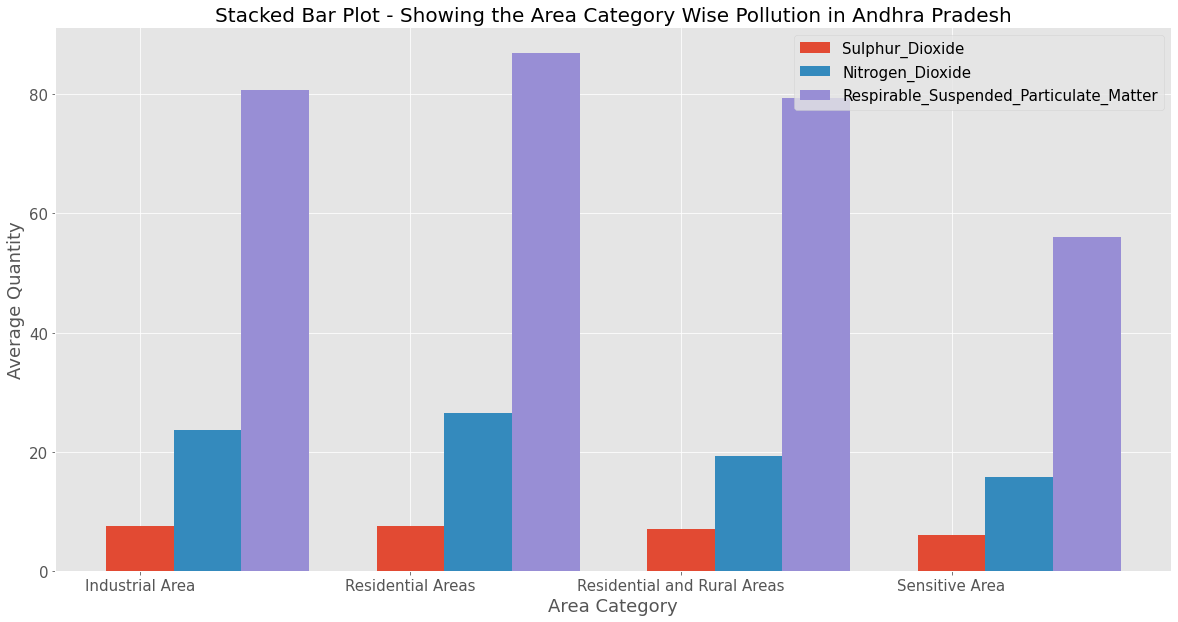

In [33]:
state = 'Andhra Pradesh'
features = ['Area Category', 'Sulphur_Dioxide', 'Nitrogen_Dioxide','Respirable_Suspended_Particulate_Matter']
required_df = air_quality_df.loc[air_quality_df['State'] == state, features].groupby('Area Category').mean()

fig, ax = plt.subplots()

x_columns = required_df.index.tolist()
columns_ = np.arange(len(x_columns))

ax.bar(x=columns_, height=required_df[Constant_Pollutants[0]], label=Constant_Pollutants[0], width=0.25)
ax.bar(x=columns_+0.25, height=required_df[Constant_Pollutants[1]], label=Constant_Pollutants[1], width=0.25)
ax.bar(x=columns_+0.50, height=required_df[Constant_Pollutants[2]], label=Constant_Pollutants[2], width=0.25)

ax.set_xticks(columns_)
ax.set_xticklabels(x_columns)
ax.legend()

plt.title('Stacked Bar Plot - Showing the Area Category Wise Pollution in {}'.format(state),
          fontdict={'fontsize': 20})
ax.set_xlabel('Area Category')
ax.set_ylabel('Average Quantity')
plt.show()
